In [2]:
import pandas as pd

df = pd.read_csv("/home/alex/workstudio/pizza-restaurants-and-the-pizza-they-sell/Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv")

In [3]:
df.shape


(10000, 24)

In [4]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [5]:
df.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                    10000 non-null object
dateAdded             10000 non-null object
dateUpdated           10000 non-null object
address               10000 non-null object
categories            10000 non-null object
primaryCategories     10000 non-null object
city                  10000 non-null object
country               10000 non-null object
keys                  10000 non-null object
latitude              10000 non-null float64
longitude             10000 non-null float64
menuPageURL           1679 non-null object
menus.amountMax       10000 non-null float64
menus.amountMin       10000 non-null float64
menus.currency        10000 non-null object
menus.dateSeen        10000 non-null object
menus.description     3718 non-null object
menus.name            10000 non-null object
name                  10000 non-null object
postalCode            9996 non-null object
priceRangeC

In [7]:
pizza_sub = df.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
id                 10000 non-null object
city               10000 non-null object
address            10000 non-null object
postalCode         9996 non-null object
menus.name         10000 non-null object
latitude           10000 non-null float64
longitude          10000 non-null float64
menus.amountMax    10000 non-null float64
menus.amountMin    10000 non-null float64
dtypes: float64(4), object(5)
memory usage: 703.2+ KB


In [8]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')



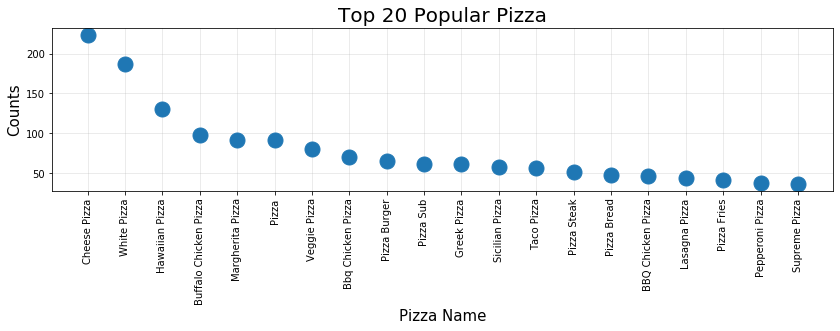

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,3))
plt.plot(names_of_pizza.head(20), linestyle='none', markersize=15, marker='o')
plt.title('Top 20 Popular Pizza', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Pizza Name', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()
